# Comparing Texts

## Imports

In [1]:
# packages
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import spacy
from nltk.probability import FreqDist
from wordcloud import WordCloud

In [2]:
# load data
df = pd.read_csv('Data/Fake_Real_News_Data.csv')

In [3]:
# preview data
df.head()

,Unnamed: 0,title,text,label
0,0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL
1,1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL
2,2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE
3,3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL
4,4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [5]:
# check for missing values
df.isna().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [6]:
# check for duplicates
df.duplicated().sum()

0

## 1. Clean the Data

In [7]:
# drop unnecessary columns
df = df.drop(columns='Unnamed: 0')

In [8]:
# verify changes
df.head()

,title,text,label
0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL
1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL
2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE
3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL
4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL


In [9]:
df['lower_text'] = df['text'].str.lower()
df.head()

,title,text,label,lower_text
0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL,donald trump endorsed an unabashedly noninterv...
1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL,while some justice department investigations a...
2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE,trump proudly declares: most of the people i’v...
3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL,donald trump spent a day in january 2014 hobno...
4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL,notable names include ray washburne (commerce)...


## 2. Prepare the Data

### Create Tokens

In [10]:
df['tokens'] = df['lower_text'].str.split()
df.head()

,title,text,label,lower_text,tokens
0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL,donald trump endorsed an unabashedly noninterv...,"[donald, trump, endorsed, an, unabashedly, non..."
1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL,while some justice department investigations a...,"[while, some, justice, department, investigati..."
2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE,trump proudly declares: most of the people i’v...,"[trump, proudly, declares:, most, of, the, peo..."
3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL,donald trump spent a day in january 2014 hobno...,"[donald, trump, spent, a, day, in, january, 20..."
4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL,notable names include ray washburne (commerce)...,"[notable, names, include, ray, washburne, (com..."


### Create Lemmas

In [11]:
# load spacy model with parser and ner disabled
nlp_model = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# verify parser and ner not loaded
nlp_model.pipe_names

['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer']

In [12]:
## [V1 List Comp] Define a function to use spacy to process our text
def spacy_process(text):
        """Lemmatize tokens, lower case, remove punctuation, spaces, and stop words"""
        doc = nlp_model(text)
        processed_doc = [token.lemma_.lower() for token in doc if not token.is_punct and 
                         not token.is_space and not token.is_stop and 
                         not 'http' in token.lemma_.lower() and 'www' not in token.lemma_.lower()]
        return processed_doc

In [13]:
## process the text using the spacy function
df['spacy_lemmas'] = df['text'].apply(spacy_process)
df.head()

,title,text,label,lower_text,tokens,spacy_lemmas
0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL,donald trump endorsed an unabashedly noninterv...,"[donald, trump, endorsed, an, unabashedly, non...","[donald, trump, endorse, unabashedly, noninter..."
1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL,while some justice department investigations a...,"[while, some, justice, department, investigati...","[justice, department, investigation, adversari..."
2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE,trump proudly declares: most of the people i’v...,"[trump, proudly, declares:, most, of, the, peo...","[trump, proudly, declare, people, insult, dese..."
3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL,donald trump spent a day in january 2014 hobno...,"[donald, trump, spent, a, day, in, january, 20...","[donald, trump, spend, day, january, 2014, hob..."
4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL,notable names include ray washburne (commerce)...,"[notable, names, include, ray, washburne, (com...","[notable, name, include, ray, washburne, comme..."


## 3. Joined lemmatized data

### join each lemmatized document into a single string.

In [14]:
# Join list of lemmas into a string with spaces between each lemma
df['lemmas-joined'] = df['spacy_lemmas'].map(lambda x: " ".join(x))

In [15]:
# verify changes
df.head()

,title,text,label,lower_text,tokens,spacy_lemmas,lemmas-joined
0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL,donald trump endorsed an unabashedly noninterv...,"[donald, trump, endorsed, an, unabashedly, non...","[donald, trump, endorse, unabashedly, noninter...",donald trump endorse unabashedly noninterventi...
1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL,while some justice department investigations a...,"[while, some, justice, department, investigati...","[justice, department, investigation, adversari...",justice department investigation adversarial n...
2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE,trump proudly declares: most of the people i’v...,"[trump, proudly, declares:, most, of, the, peo...","[trump, proudly, declare, people, insult, dese...",trump proudly declare people insult deserved a...
3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL,donald trump spent a day in january 2014 hobno...,"[donald, trump, spent, a, day, in, january, 20...","[donald, trump, spend, day, january, 2014, hob...",donald trump spend day january 2014 hobnob pol...
4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL,notable names include ray washburne (commerce)...,"[notable, names, include, ray, washburne, (com...","[notable, name, include, ray, washburne, comme...",notable name include ray washburne commerce da...


## Analyze class balance and document lengths:

### 1. What is the class balance? How many real and fake articles are there?

In [16]:
# normalized class balance
df['label'].value_counts(normalize=True)

REAL    0.500552
FAKE    0.499448
Name: label, dtype: float64

In [17]:
# raw value count of real vs. fake articles
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

### 2. What is the average word count for real news articles? What about fake ones?

In [18]:
# map the len() function to the tokenized text to create a new column
df['words'] = list(map(len, df['tokens']))

In [19]:
# verify changes
df.head()

,title,text,label,lower_text,tokens,spacy_lemmas,lemmas-joined,words
0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL,donald trump endorsed an unabashedly noninterv...,"[donald, trump, endorsed, an, unabashedly, non...","[donald, trump, endorse, unabashedly, noninter...",donald trump endorse unabashedly noninterventi...,1428
1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL,while some justice department investigations a...,"[while, some, justice, department, investigati...","[justice, department, investigation, adversari...",justice department investigation adversarial n...,1091
2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE,trump proudly declares: most of the people i’v...,"[trump, proudly, declares:, most, of, the, peo...","[trump, proudly, declare, people, insult, dese...",trump proudly declare people insult deserved a...,408
3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL,donald trump spent a day in january 2014 hobno...,"[donald, trump, spent, a, day, in, january, 20...","[donald, trump, spend, day, january, 2014, hob...",donald trump spend day january 2014 hobnob pol...,1959
4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL,notable names include ray washburne (commerce)...,"[notable, names, include, ray, washburne, (com...","[notable, name, include, ray, washburne, comme...",notable name include ray washburne commerce da...,19


In [20]:
real_df = df[df['label'] == 'REAL'] 

In [21]:
# average word count of real articles
real_df['words'].mean()

873.2576474298329

In [22]:
fake_df = df[df['label'] == 'FAKE'] 

In [23]:
# average word count of fake articles
fake_df['words'].mean()

679.1292667509482

## Compare the word frequencies:

### 1. Create and plot the frequency distribution plots for the 20 most common words in real and fake news articles. (2 total plots)
    Use the lemmatized text (spacy_lemmas)

In [24]:
# preview data
real_lemmas = real_df['spacy_lemmas']
real_lemmas.count()

3171

In [25]:
# concatenate all lists of real lemmas
real_results = []
for x in real_lemmas:
    x=0

    if x == 3171:
        break
    real_results = real_results+real_lemmas[x]
    x=x+1

In [26]:
real_results

['donald',
 'trump',
 'endorse',
 'unabashedly',
 'noninterventionist',
 'approach',
 'world',
 'affair',
 'monday',
 'day',
 'long',
 'tour',
 'washington',
 'cast',
 'doubt',
 'need',
 'north',
 'atlantic',
 'treaty',
 'organization',
 'express',
 'skepticism',
 'muscular',
 'u.s.',
 'military',
 'presence',
 'asia',
 'foreign',
 'policy',
 'position',
 'outline',
 'meeting',
 'editorial',
 'board',
 'washington',
 'post',
 'come',
 'day',
 'trump',
 'set',
 'aside',
 'guerrilla',
 'tactic',
 'showman',
 'bravado',
 'power',
 'campaign',
 'appear',
 'presidential',
 'nominee',
 'explain',
 'policy',
 'accept',
 'counsel',
 'build',
 'bridge',
 'republican',
 'elite',
 'monday',
 'night',
 'trump',
 'deliver',
 'scripted',
 'address',
 'american',
 'israel',
 'public',
 'affairs',
 'committee',
 'prompt',
 'ovation',
 'pledge',
 'stand',
 'israel',
 'hard',
 'line',
 'peace',
 'talk',
 'palestinians',
 'trump',
 'whirlwind',
 'day',
 'appearance',
 'nation',
 'capital',
 'intend',
 'h

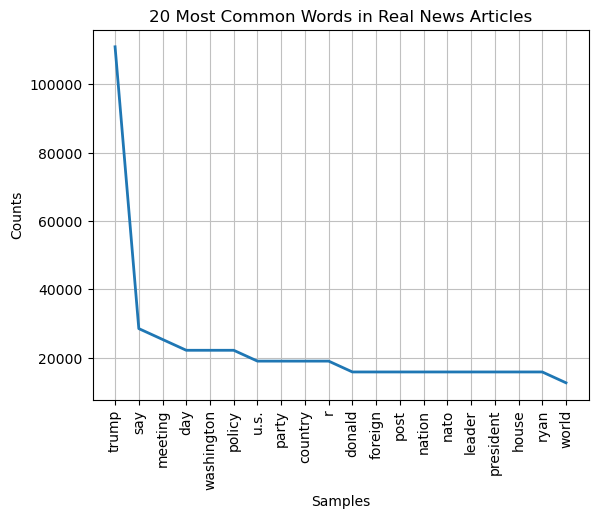

In [27]:
# Pass the tokenized lemmas to the class constructor and plot the distribution 
low_dist = FreqDist(real_results)
ax = low_dist.plot(20, show = False, title='20 Most Common Words in Real News Articles');

In [28]:
# preview data
fake_lemmas = fake_df['spacy_lemmas']
fake_lemmas.count()

3164

In [29]:
# concatenate all lists of real lemmas
fake_results = []
for x in fake_lemmas:
    x=2
    if x == 3164:
        break
    fake_results = fake_results+fake_lemmas[x]
    x=x+1

In [30]:
fake_results

['trump',
 'proudly',
 'declare',
 'people',
 'insult',
 'deserved',
 'andrew',
 'bradford',
 'october',
 '27',
 '2016',
 'subscribe',
 'arrogance',
 'define',
 'insulting',
 'way',
 'thinking',
 'behave',
 'come',
 'believe',
 'well',
 'smart',
 'important',
 'people',
 'word',
 'donald',
 'trump',
 'perfectly',
 'exemplify',
 'arrogance',
 'prove',
 'fact',
 'appear',
 'good',
 'morning',
 'america',
 'thursday',
 'morning',
 'gop',
 'nominee',
 'readily',
 'defend',
 'insulting',
 'post',
 'twitter',
 'ok',
 'deserve',
 'trump',
 'declare',
 'believe',
 'fight',
 'people',
 'tell',
 'lie',
 'know',
 'power',
 'instrument',
 'frankly',
 'use',
 'agree',
 'revert',
 'maybe',
 'come',
 'careful',
 'exactly',
 'trump',
 'careful',
 'post',
 'social',
 'medium',
 'try',
 'melania',
 'trump',
 'interview',
 'say',
 'lady',
 'primary',
 'area',
 'focus',
 'social',
 'medium',
 'go',
 'hurtful',
 'child',
 'adult',
 'mean',
 'away',
 'donald',
 'cell',
 'phone',
 'duct',
 'tape',
 'hand',
 

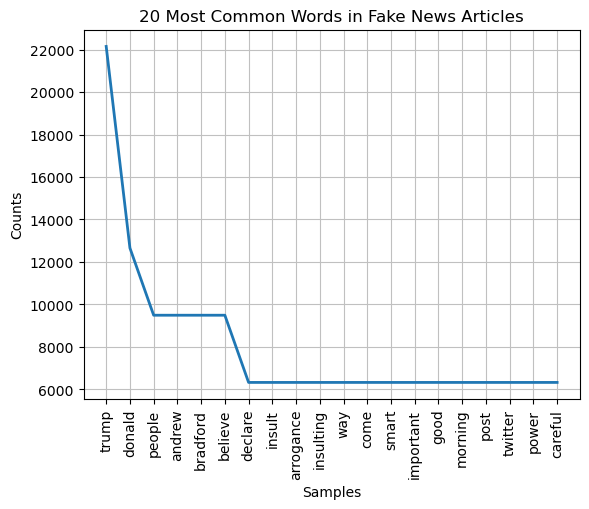

In [31]:
# Pass the tokenized lemmas to the class constructor and plot the distribution 
low_dist = FreqDist(fake_results)
ax = low_dist.plot(20, show = False, title='20 Most Common Words in Fake News Articles');

### 2. Create word clouds for each of the article types, real and fake (2 total word clouds)
    Use the joined lemmatized text (lemmas-joined)

In [32]:
# create filter for real news articles
filter_real = df['label']=='REAL'

In [33]:
filter_fake = df['label']=='FAKE'

In [34]:
# Make a single giant string with entire group of 5 star lemmas
real_lemmas_joined= " ".join(df.loc[filter_real, 'lemmas-joined'])
# Make a single giant string with entire group of 1 star lemmas
fake_lemmas_joined= " ".join(df.loc[filter_fake, 'lemmas-joined'])

In [35]:
real_cloud = WordCloud(random_state = 42,
                      width = 800,
                      height = 1000,
                      min_word_length = 2, colormap="Reds",
                     ).generate(real_lemmas_joined)
fake_cloud = WordCloud(random_state = 42,
                       width = 800,
                       height= 1000,
                       min_word_length = 2,
                       colormap="Blues",
                      ).generate(fake_lemmas_joined)

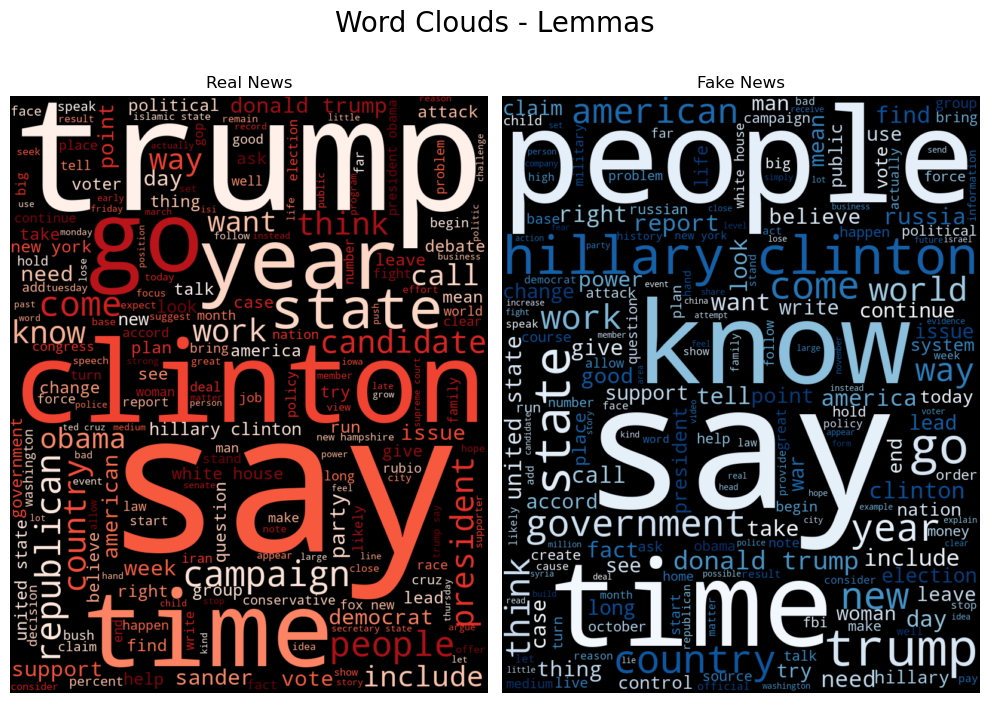

In [36]:
# Plot the wordclouds side by side
fig, axes = plt.subplots(ncols=2, figsize=(10, 7))
axes[0].imshow(real_cloud, interpolation='bilinear')
axes[0].set_title("Real News")
axes[1].imshow(fake_cloud, interpolation='bilinear')
axes[1].set_title("Fake News")
[ax.axis('off') for ax in axes]
fig.tight_layout();
fig.suptitle('Word Clouds - Lemmas', fontsize=20, y=1.05);

# Core: Text Classification with SK Learnevaluation function.

### Prepare imports and functions

    Import necessary packages to split, grid search, vectorize, and model your data.

    Add a function to evaluate a classification model. You can use the one from the Learn Platform.


## Imports

In [51]:
# packages

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [41]:
# functions

from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False,values_format=".2f"):
    """Modified version of classification metrics function from Intro to Machine Learning.
    Updates:
    - Reversed raw counts confusion matrix cmap  (so darker==more).
    - Added arg for normalized confusion matrix values_format
    """
    # Get the classification report
    report = classification_report(y_true, y_pred)
    
    ## Print header and report
    header = "-"*70
    print(header, f" Classification Metrics: {label}", header, sep='\n')
    print(report)
    
    ## CONFUSION MATRICES SUBPLOTS
    fig, axes = plt.subplots(ncols=2, figsize=figsize)
    
    # Create a confusion matrix  of raw counts (left subplot)
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                            normalize=None, 
                                            cmap='gist_gray_r',# Updated cmap
                                            values_format="d", 
                                            colorbar=colorbar,
                                            ax = axes[0]);
    axes[0].set_title("Raw Counts")
    
    # Create a confusion matrix with the data with normalize argument 
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                            normalize=normalize,
                                            cmap=cmap, 
                                            values_format=values_format, #New arg
                                            colorbar=colorbar,
                                            ax = axes[1]);
    axes[1].set_title("Normalized Confusion Matrix")
    
    # Adjust layout and show figure
    fig.tight_layout()
    plt.show()
    
    # Return dictionary of classification_report
    if output_dict==True:
        report_dict = classification_report(y_true, y_pred, output_dict=True)
        return report_dict
    
    
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

### Prepare the Data

    Split your data into X and y variables. Your 'X' variable will be the joined lemmatized text (NOT the tokenized text) you created previously and the 'label' column will be your y variable.

In [43]:
# define X and y
X = df['lemmas-joined']
y = df['label']

In [44]:
# Checking class balance 
y.value_counts(normalize=True)

REAL    0.500552
FAKE    0.499448
Name: label, dtype: float64

In [45]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,
                                                    random_state=42)

### Prepare parameter grids for your grid search.

#### Create a pipeline with a vectorizer and a model. It doesn't matter at this point which ones, but the vectorizer step should be named 'vectorizer' and the model step should be named 'clf'.

In [52]:
# Create a pipeline with a vectorizer and classification model.
clf_pipe = Pipeline([('vectorizer', CountVectorizer(stop_words='english')),
                     ('clf',RandomForestClassifier(random_state=42))])
clf_pipe

Pipeline(steps=[('vectorizer', CountVectorizer(stop_words='english')),
                ('clf', RandomForestClassifier(random_state=42))])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        FAKE       1.00      1.00      1.00      2393
        REAL       1.00      1.00      1.00      2358

    accuracy                           1.00      4751
   macro avg       1.00      1.00      1.00      4751
weighted avg       1.00      1.00      1.00      4751



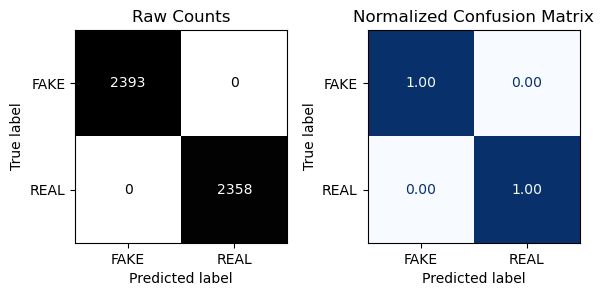


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        FAKE       0.90      0.89      0.90       771
        REAL       0.90      0.91      0.90       813

    accuracy                           0.90      1584
   macro avg       0.90      0.90      0.90      1584
weighted avg       0.90      0.90      0.90      1584



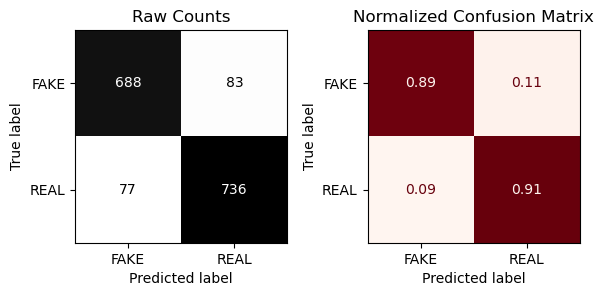

In [53]:
# Fit the model pipeline
clf_pipe.fit(X_train, y_train)
# Evaluate
evaluate_classification(clf_pipe, X_train,y_train, X_test, y_test)

#### Prepare parameter grids for CountVectorizer and TfidfVectorizer

        You should tune at least 1 parameter in each vectorizer and 4 total.

        Remember that the more parameters you tune, the longer your grid search will take.

        Also, include a parameter to tune the ngram range. This will make the vectorizer try ngrams as well as single tokens. You can use the code below to add this parameter to the grid

            'vectorizer__ngram_range': [(1, 1), (1, 2)]

Prepare parameter grids for a MultinomialNB model and at least 1 other classification model.

        We recommend not using an ensemble model. They may end up with higher accuracy but will increase the fit time of your grid search considerably.

    Use itertools.product() to create all combinations of vectorizers and models.

    Use a loop to combine the parameter grids for each combination of vectorizer and model.

### Create the best model using GridSearchCV
    
    Find the best combination of vectorizer, model, and hyperparameters for each to create the most accurate model. This step may take between 15 and 30 minutes, or even more, depending on how many parameters you choose to tune.
    
    Print out your best combination of vectorizer, model, and parameters for each. Refer to this lesson if you need a refresher on GridSearchCV.


### Evaluate your best model with your evaluation function.